# Analyse Exploratoire des données du Titanic

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('titanic3.xls')
data.head() #affiche les premières lignes

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [174]:
print(max(data.fare))

512.3292


In [239]:
data['pclass'].unique() #présente les valeurs prise dans une colonne

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [175]:
#si le dataframe provient d'une source en ligne
from sklearn.datasets import load_wine 
wine = load_wine(as_frame=True)
wine.frame
#permet de transformer un dataframe en ligne en dataframe exploitatble avec pandas
data_wine=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

data_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [176]:
data.info() #renseigne sur la présence de valeurs non nulles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [177]:
data.describe() #permet d'obtenir les constantes des colonnes contenants de valeurs quantitatives

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [178]:
data.index

RangeIndex(start=0, stop=1309, step=1)

In [241]:
data.dtypes #obtient le type des données d'une colonne

pclass         category
survived          int64
name             object
sex               int64
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked          int64
boat             object
body            float64
home.dest        object
age_band          int64
family_size       int64
alone             int64
fare_range     category
fare_cat          int64
dtype: object

<AxesSubplot: >

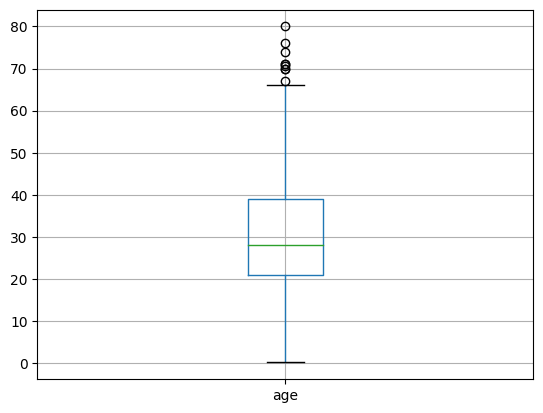

In [250]:
data[['age']].boxplot()

In [252]:
data.corr() #corrélation entre les valeurs

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_9372\1925646214.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() #corrélation entre les valeurs


,survived,sex,age,sibsp,parch,fare,embarked,body,age_band,family_size,alone,fare_cat
survived,1.000000,0.528693,-0.055513,-0.027825,0.082660,0.244265,0.098450,NaN,0.021418,0.026876,-0.201719,0.272798
sex,0.528693,1.000000,-0.063646,0.109609,0.213125,0.185523,0.120423,0.015903,-0.009663,0.188583,-0.284537,0.235715
age,-0.055513,-0.063646,1.000000,-0.243699,-0.150917,0.178739,0.047410,0.058809,0.946572,-0.240230,0.128755,0.140653
sibsp,-0.027825,0.109609,-0.243699,1.000000,0.373587,0.160238,-0.073461,-0.099961,-0.149215,0.861952,-0.591077,0.383522
parch,0.082660,0.213125,-0.150917,0.373587,1.000000,0.221539,-0.095523,0.051099,-0.051147,0.792296,-0.549022,0.371730
fare,0.244265,0.185523,0.178739,0.160238,0.221539,1.000000,0.061126,-0.043110,0.216531,0.226492,-0.274895,0.579058
embarked,0.098450,0.120423,0.047410,-0.073461,-0.095523,0.061126,1.000000,0.033860,-0.141324,-0.100529,0.046826,-0.118695
body,NaN,0.015903,0.058809,-0.099961,0.051099,-0.043110,0.033860,1.000000,0.016054,-0.033628,-0.002237,0.022787
age_band,0.021418,-0.009663,0.946572,-0.149215,-0.051147,0.216531,-0.141324,0.016054,1.000000,-0.126103,-0.010185,0.201862
family_size,0.026876,0.188583,-0.240230,0.861952,0.792296,0.226492,-0.100529,-0.033628,-0.126103,1.000000,-0.688864,0.455441


In [179]:
data.columns #permet de voir le nom de toutes les colonnes du dataframe

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [180]:
data.sort_values(by="age") #range le tableau en fonction de la colonne sélectionnée

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.5750,NaN,S,10,NaN,"Devon, England Wichita, KS"
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.3333,0,2,347080,14.4000,NaN,S,NaN,NaN,"Stanton, IA"
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,NaN,C,16,NaN,NaN
427,2,1,"Hamalainen, Master. Viljo",male,0.6667,1,1,250649,14.5000,NaN,S,4,NaN,"Detroit, MI"
1111,3,0,"Peacock, Master. Alfred Edward",male,0.7500,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,NaN,NaN,NaN
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN


In [181]:
data.loc[1 : 10, ["age", "sex"]] #permet de visualiser certaines colonnes par leur nom

,age,sex
1,0.9167,male
2,2.0000,female
3,30.0000,male
4,25.0000,female
5,48.0000,male
6,63.0000,female
7,39.0000,male
8,53.0000,female
9,71.0000,male
10,47.0000,male


In [182]:
data.iloc[1: 10 , 2 : 5] #permet de visualiser certaines colonnes contenu entre deux valeurs de position

,name,sex,age
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000
5,"Anderson, Mr. Harry",male,48.0000
6,"Andrews, Miss. Kornelia Theodosia",female,63.0000
7,"Andrews, Mr. Thomas Jr",male,39.0000
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000
9,"Artagaveytia, Mr. Ramon",male,71.0000


In [183]:
data.iloc[[1, 10, 12], [5, 7, 9]] #permet de sélectionner certaines par leurs positions

,sibsp,ticket,cabin
1,1,113781,C22 C26
10,1,PC 17757,C62 C64
12,0,PC 17477,B35


In [184]:
data[data['age'] > 50] #sélectionne les colonnes en fonction d'une booléenne
data[data['sex'] == 'female']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


In [185]:
data[data['pclass'].isin([1])] # permet de sélectionner les lignes d'une colonne de valeur qualitative/quantitative
data[data.sex.isin(['female'])]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


In [186]:
data.isnull().sum() #permet de savoir où il y a des valeurs null

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [187]:
(data.isnull() | data.empty | data.isna()).sum() #permet de savoir s'il manque des valeurs 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<AxesSubplot: >

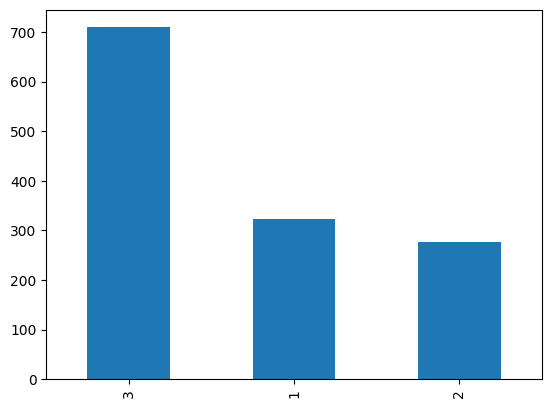

In [188]:
data.pclass=data.pclass.astype('int64').astype('category') #permet de transformer des float en integer, pour faire l'inverse, utiliser 'float64'
freq=data['pclass'].value_counts()
freq.plot(kind='bar')

## Le taux de survie général

Text(0.5, 1.0, 'Pourcentage de survie')

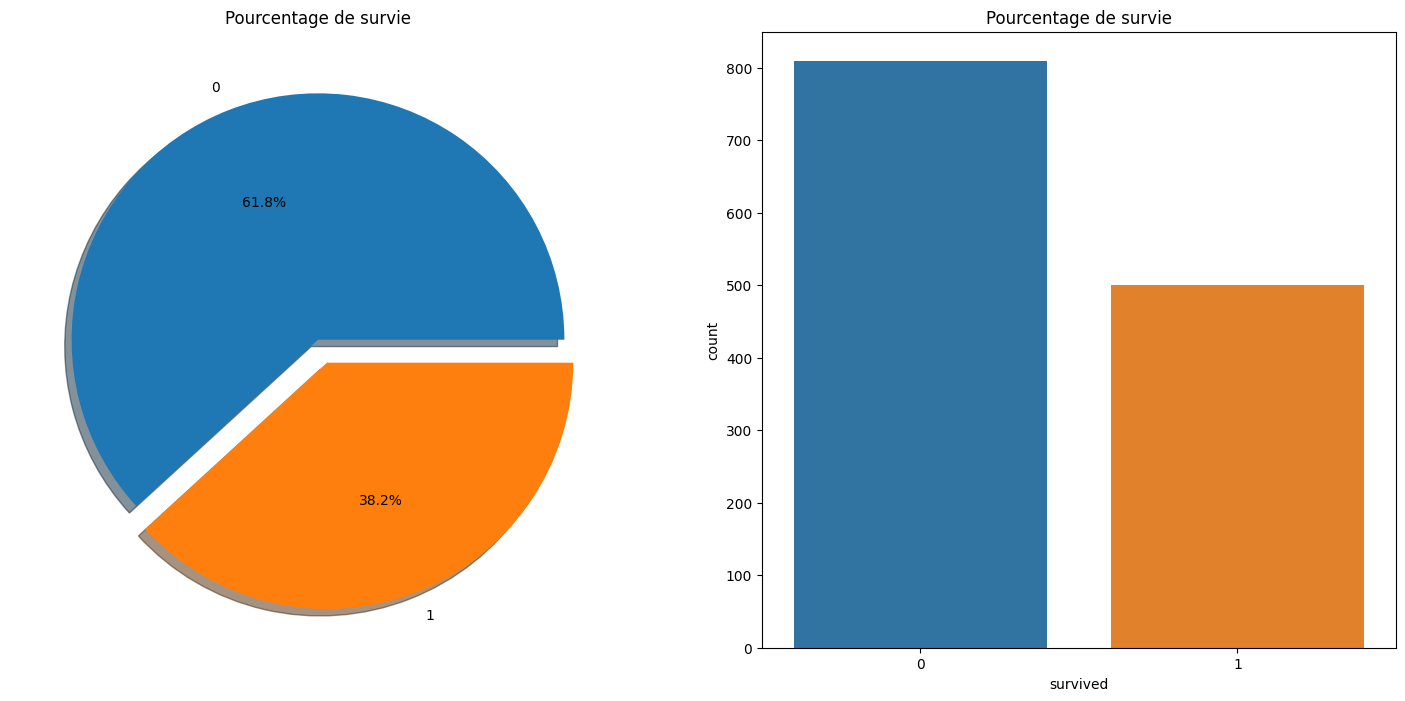

In [189]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
#créer une div sur une ligne composé de deux emplacements, placé avec ax
data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
#explode => distance entre les morceaux du fromage
#ax = position dans le subplots
ax[0].set_title('Pourcentage de survie')
ax[0].set_ylabel('')
sns.countplot(x='survived', data=data, ax=ax[1])
ax[1].set_title('Pourcentage de survie')

Sur les 1309 passagers, seul 38.2% ont survécu soit 500 passagers. 

Text(0.5, 1.0, 'Taux de survie par classe')

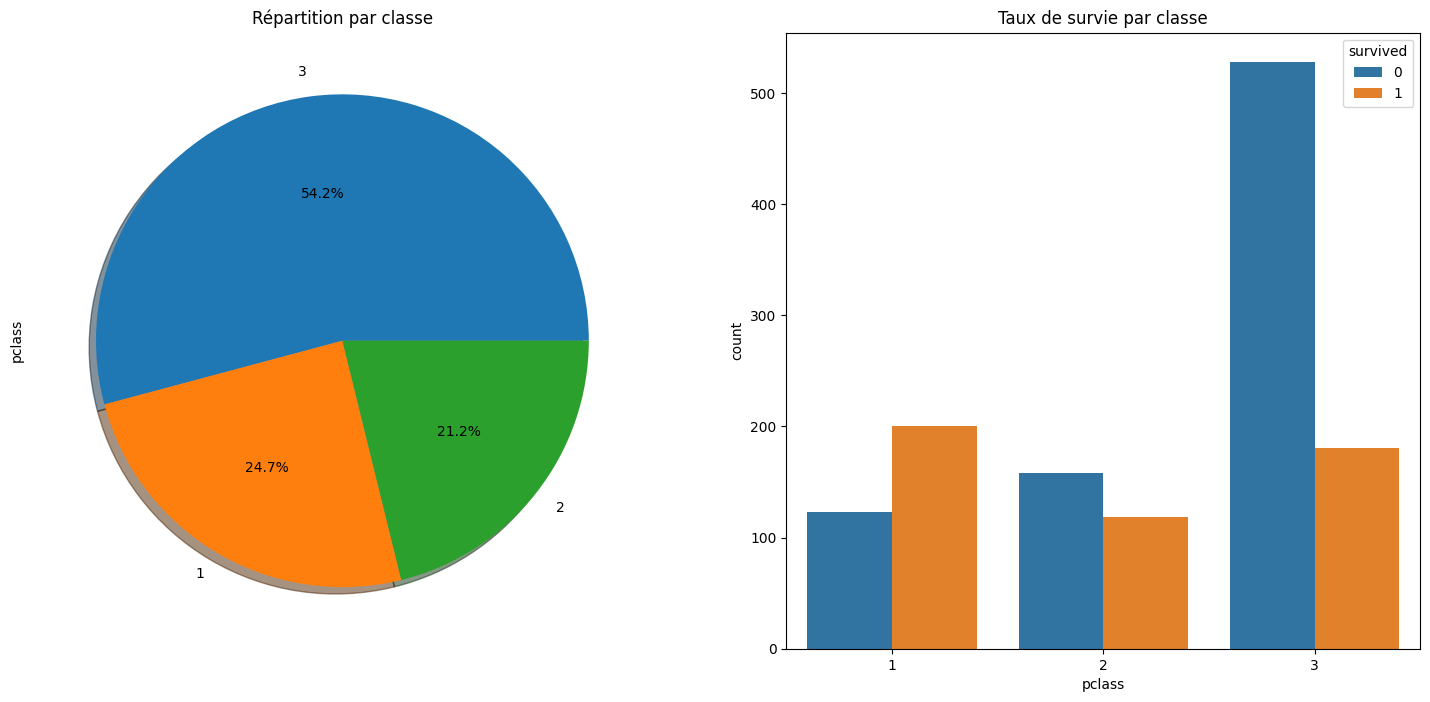

In [190]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['pclass'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Répartition par classe')
sns.countplot(x='pclass', hue = 'survived',data = data, ax= ax[1])
ax[1].set_title('Taux de survie par classe')

## Taux de survie par "sexe"

In [191]:
data.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

Text(0.5, 1.0, 'Répartition du taux de survie en fonction du sexe du passager')

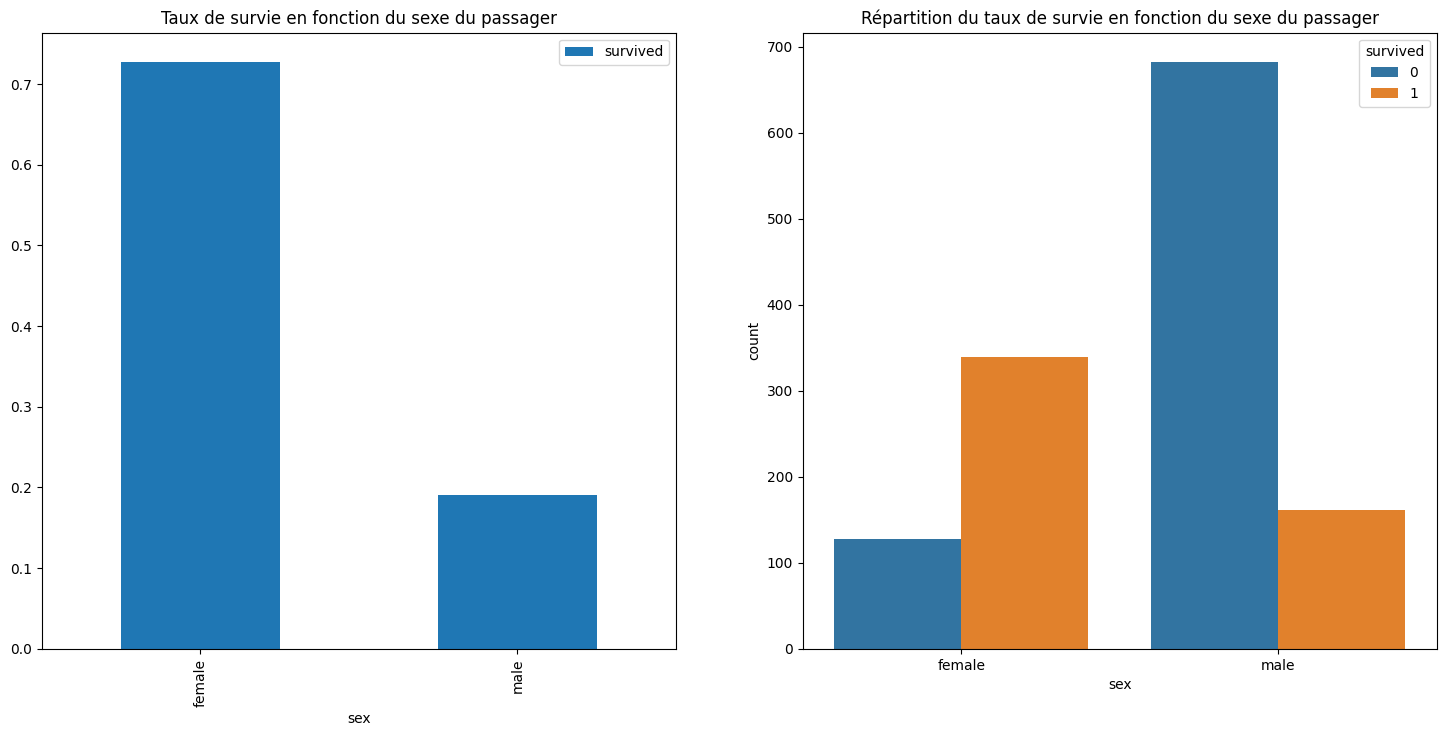

In [192]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['sex', 'survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Taux de survie en fonction du sexe du passager')
sns.countplot(x='sex', hue='survived', data = data, ax = ax[1])
ax[1].set_title('Répartition du taux de survie en fonction du sexe du passager')

Alors que les que les hommes étaient bien plus nombreux que les femmes, le nombre de ces dernières représente le double des hommes. Le taux de survie est de plus 70 %, alors que celui des hommes ne dépasse pas les 20%.

## Taux de survie par 'classe'

In [193]:
pd.crosstab(data.pclass, data.survived, margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


Text(0, 0.5, 'Nb de passagers')

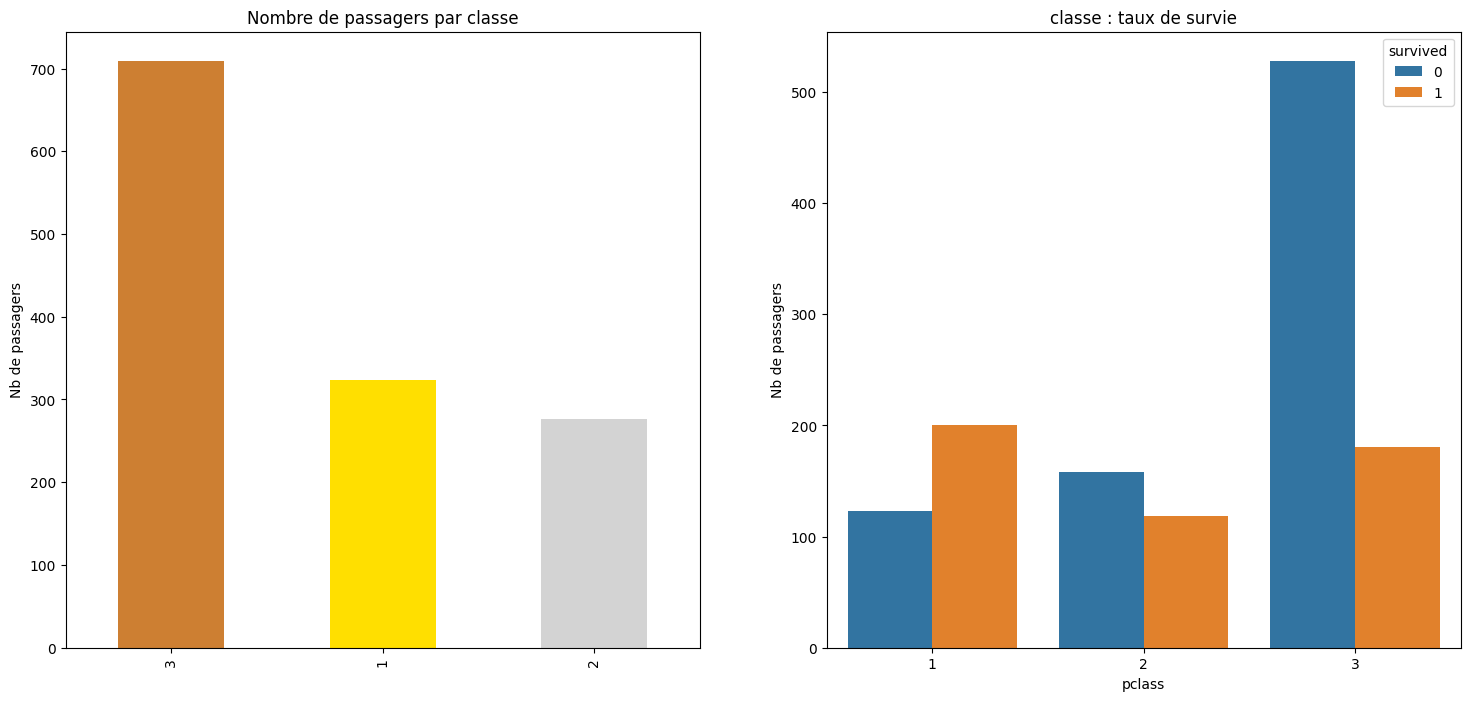

In [194]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax= ax[0])
#obtient même résultat avec sns.countplot(x='pclass', data=data, ax=ax[1])
ax[0].set_title('Nombre de passagers par classe')
ax[0].set_ylabel('Nb de passagers')
sns.countplot(x='pclass', hue='survived', data=data, ax=ax[1])
ax[1].set_title('classe : taux de survie')
ax[1].set_ylabel('Nb de passagers')

La proportion de survie apparait comme plus importante en première classe, alors que ces passagers ne représentent qu'un quart de la population générale. La troisième classe (2/3 des passagers) possède le taux se survie le plus faible.

<AxesSubplot: xlabel='pclass', ylabel='count'>

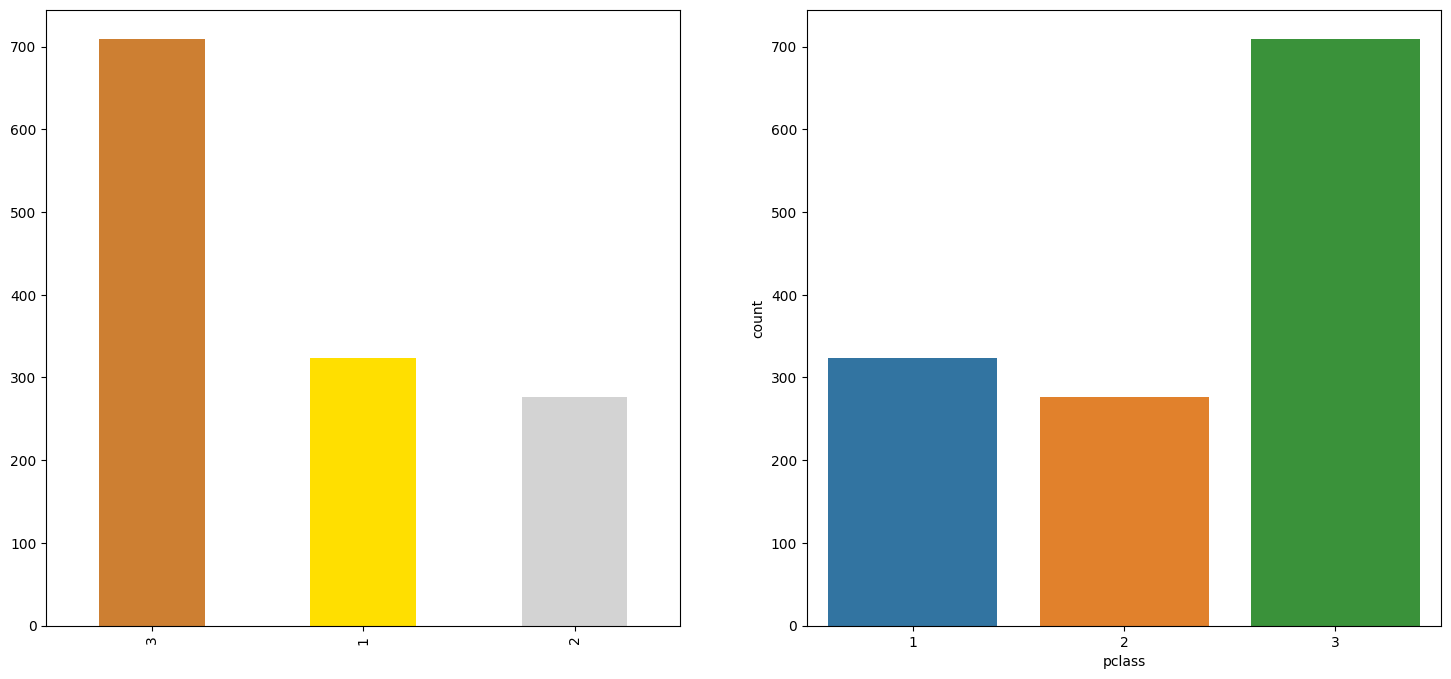

In [195]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax= ax[0])
sns.countplot(x='pclass', data=data, ax=ax[1])

## Taux de survie en fonction du 'sexe' et de la 'classe'

In [196]:
pd.crosstab([data.sex, data.survived], data.pclass, margins=True).style.background_gradient(cmap='summer_r')

In [197]:
pd.crosstab([data.sex, data.pclass, data.embarked], data.survived, margins= True).style.background_gradient(cmap='summer_r')

Text(0.5, 1.0, 'Taux de survie par classe en fonction du sexe')

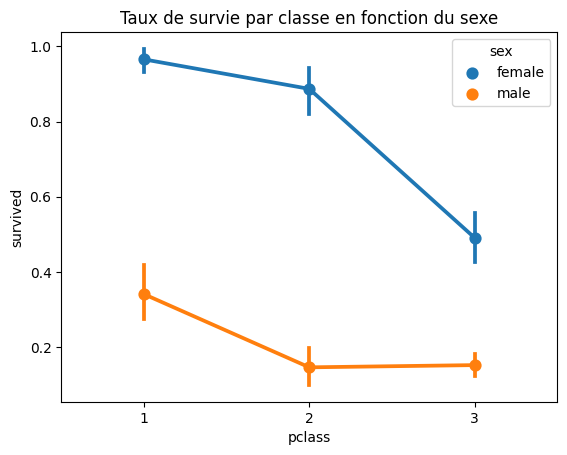

In [198]:
sns.pointplot(x='pclass',y='survived',hue='sex',data=data).set_title("Taux de survie par classe en fonction du sexe")

Le taux de survie des femmes en première classe est proche de 95%, alors que celui des hommes se trouve autour de 35%. Pour les femmes le taux se survie diminue légèrement en seconde classe et chutte à 50% en troisième classe. Pour les hommes le taux de survie est le même en seconde et troisième classe.

## Taux de survie en fonction de l'"age"

In [199]:
print(f'''Le vieux passager a: {round(data['age'].max(), 2)} ans.''')
print(f'''Le jeune passager a: {round(data['age'].min(), 2)} ans.''')
print(f'''La moyenne d'âge des passagers est de {round(data['age'].mean(), 2)} ans.''')

Le vieux passager a: 80.0 ans.
Le jeune passager a: 0.17 ans.
La moyenne d'âge des passagers est de 29.88 ans.


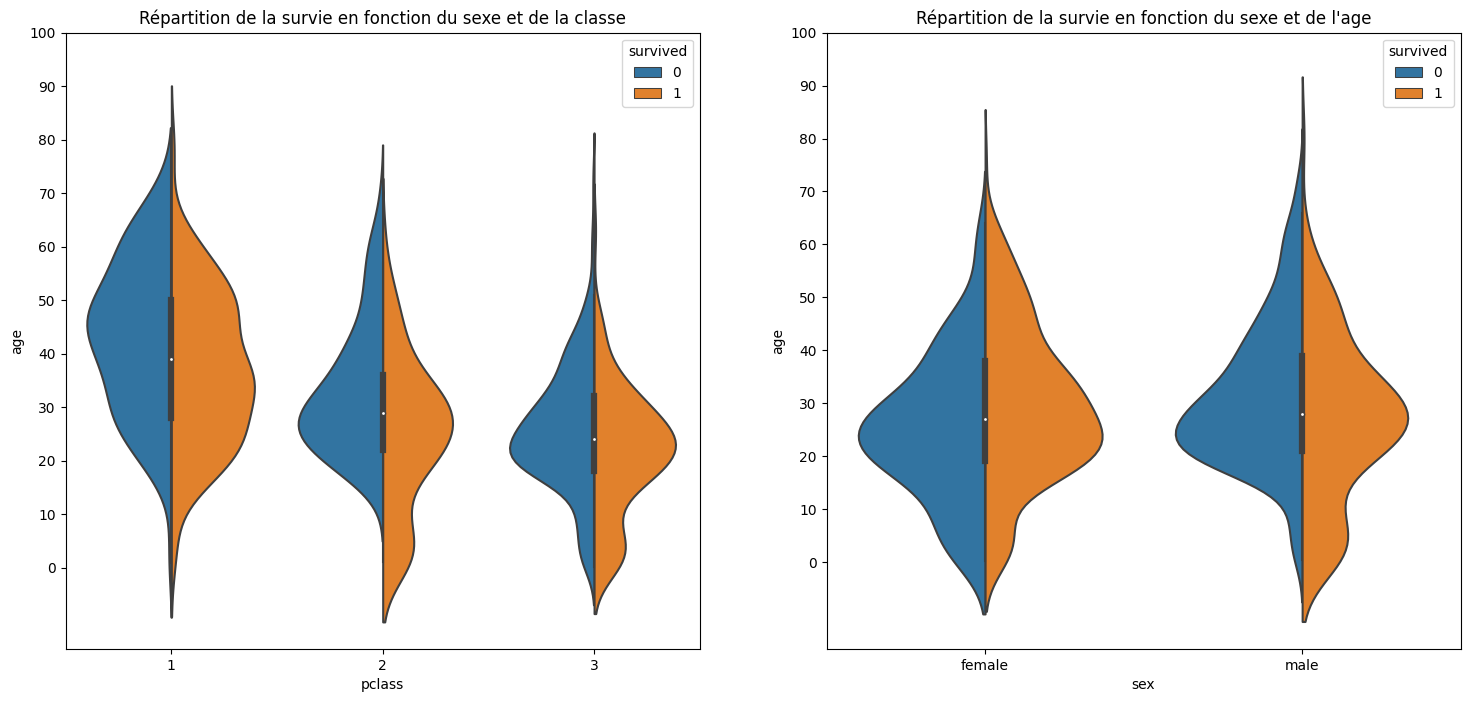

In [200]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="pclass",y="age", hue="survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Répartition de la survie en fonction de l\'âge et de la classe')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="sex",y="age", hue="survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Répartition de la survie en fonction du sexe et de l\'age')
ax[1].set_yticks(range(0,110,10))

La proportion d'enfant augmente en fonction de la classe et semble présenter un bon taux de survie. Les chances de survie pour les passagers entre 20 et 50 ans est élevé, d'autant si c'était une femme. Tandis que le taux se survie diminue pour les hommes, d'autant plus rapidement en fonction de la classe.

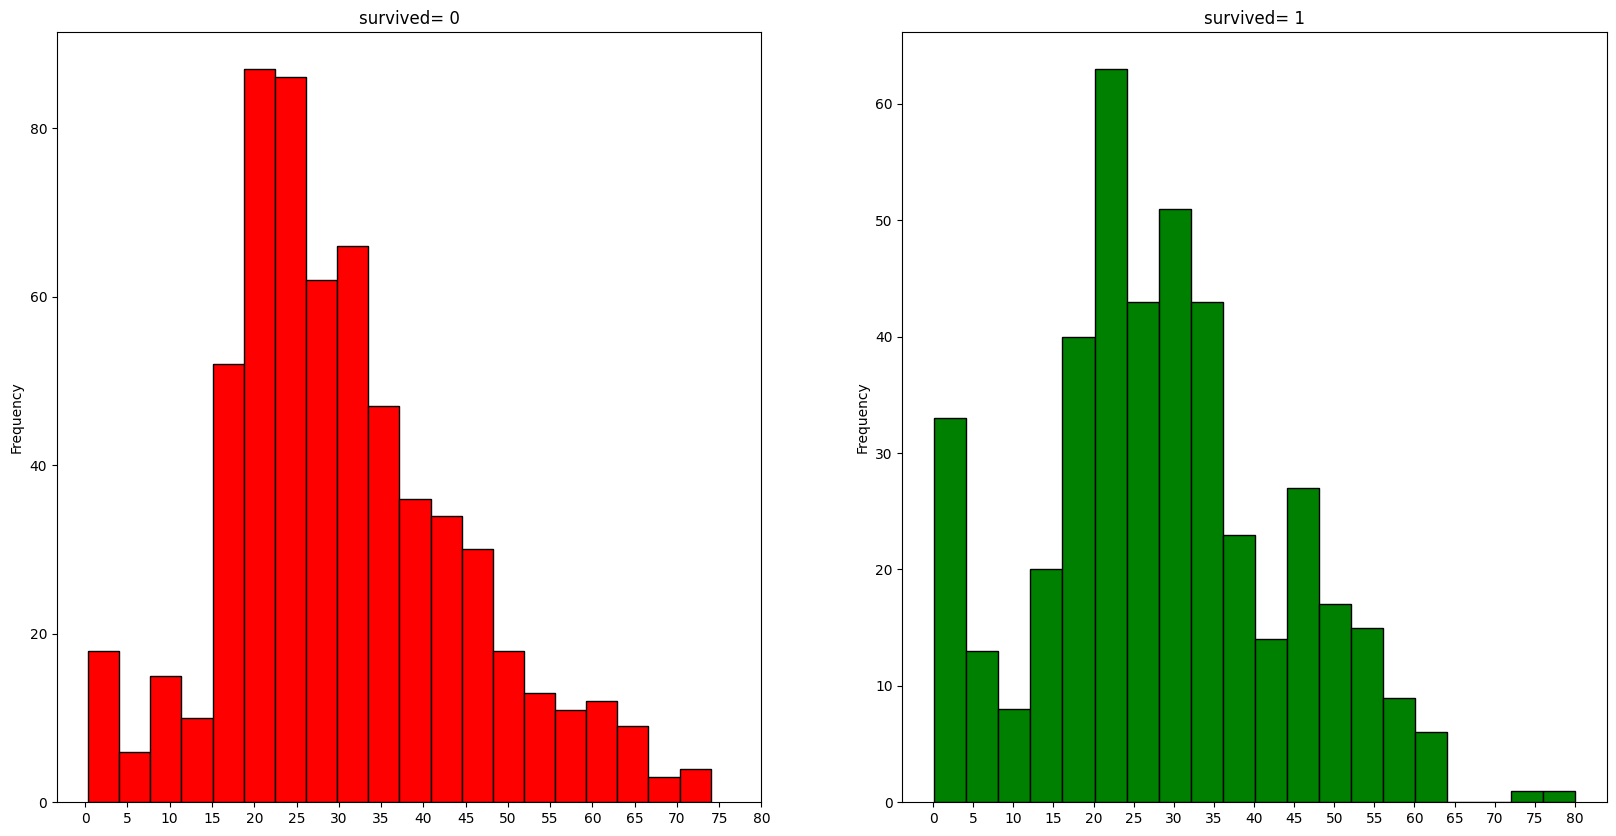

In [201]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['survived']==0].age.plot.hist(ax=ax[0],bins=20,color='red',edgecolor='black')
ax[0].set_title('survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['survived']==1].age.plot.hist(ax=ax[1],bins=20,color='green',edgecolor='black')
ax[1].set_title('survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

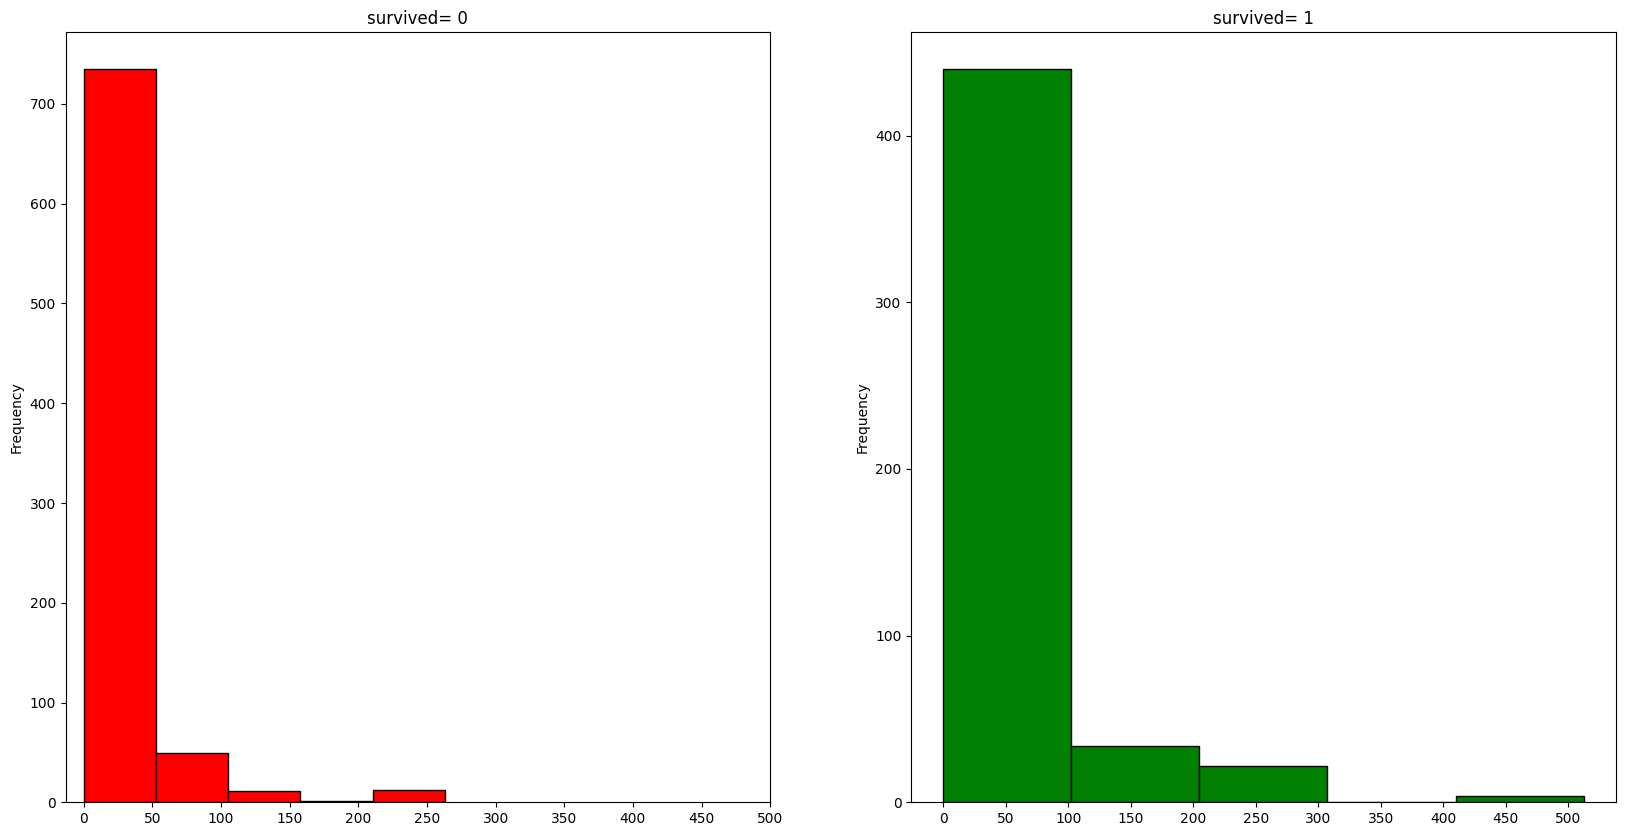

In [202]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['survived']==0].fare.plot.hist(ax=ax[0],bins=5,color='red',edgecolor='black')
ax[0].set_title('survived= 0')
x1=list(range(0,550,50))
ax[0].set_xticks(x1)
data[data['survived']==1].fare.plot.hist(ax=ax[1],bins=5,color='green',edgecolor='black')
ax[1].set_title('survived= 1')
x2=list(range(0,550,50))
ax[1].set_xticks(x2)

Les extrêmes en âge présente de bon taux de survie, contrairement aux personnes entre 30 et 40 ans.

In [203]:
pd.crosstab([data.embarked,data.pclass],[data.sex, data.survived],margins=True).style.background_gradient(cmap='summer_r')

Taux de survie en fonction du 'port d'embarquement'.

Text(0.5, 1.0, "taux de survie en fonction du port d'embarquement")

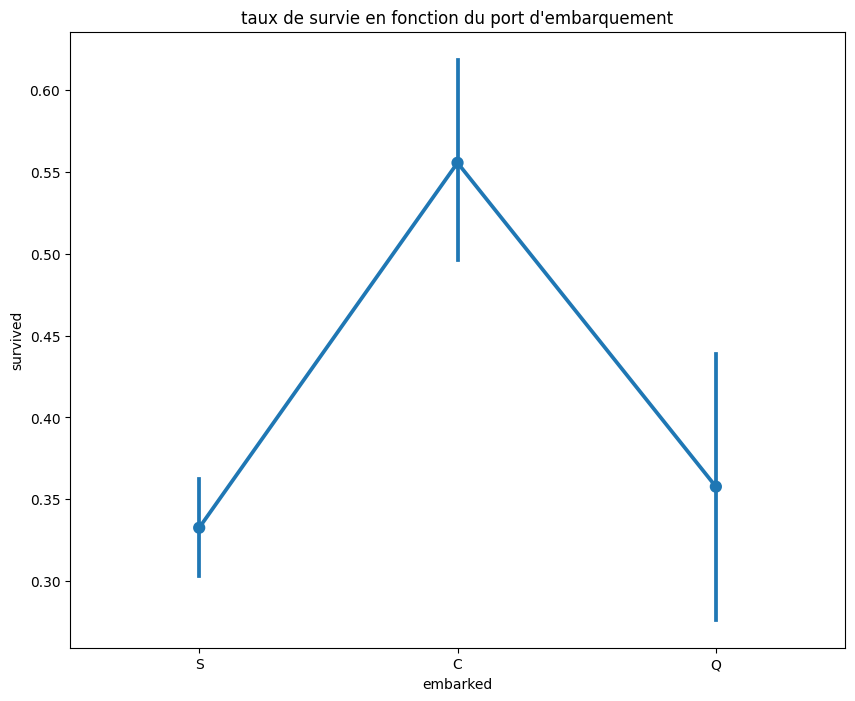

In [204]:
fig, ax = plt.subplots(figsize=(10,8))
sns.pointplot(x='embarked',y='survived',data=data, ax=ax).set_title('taux de survie en fonction du port d\'embarquement')

Le taux de survie du port C est le plus élevé.

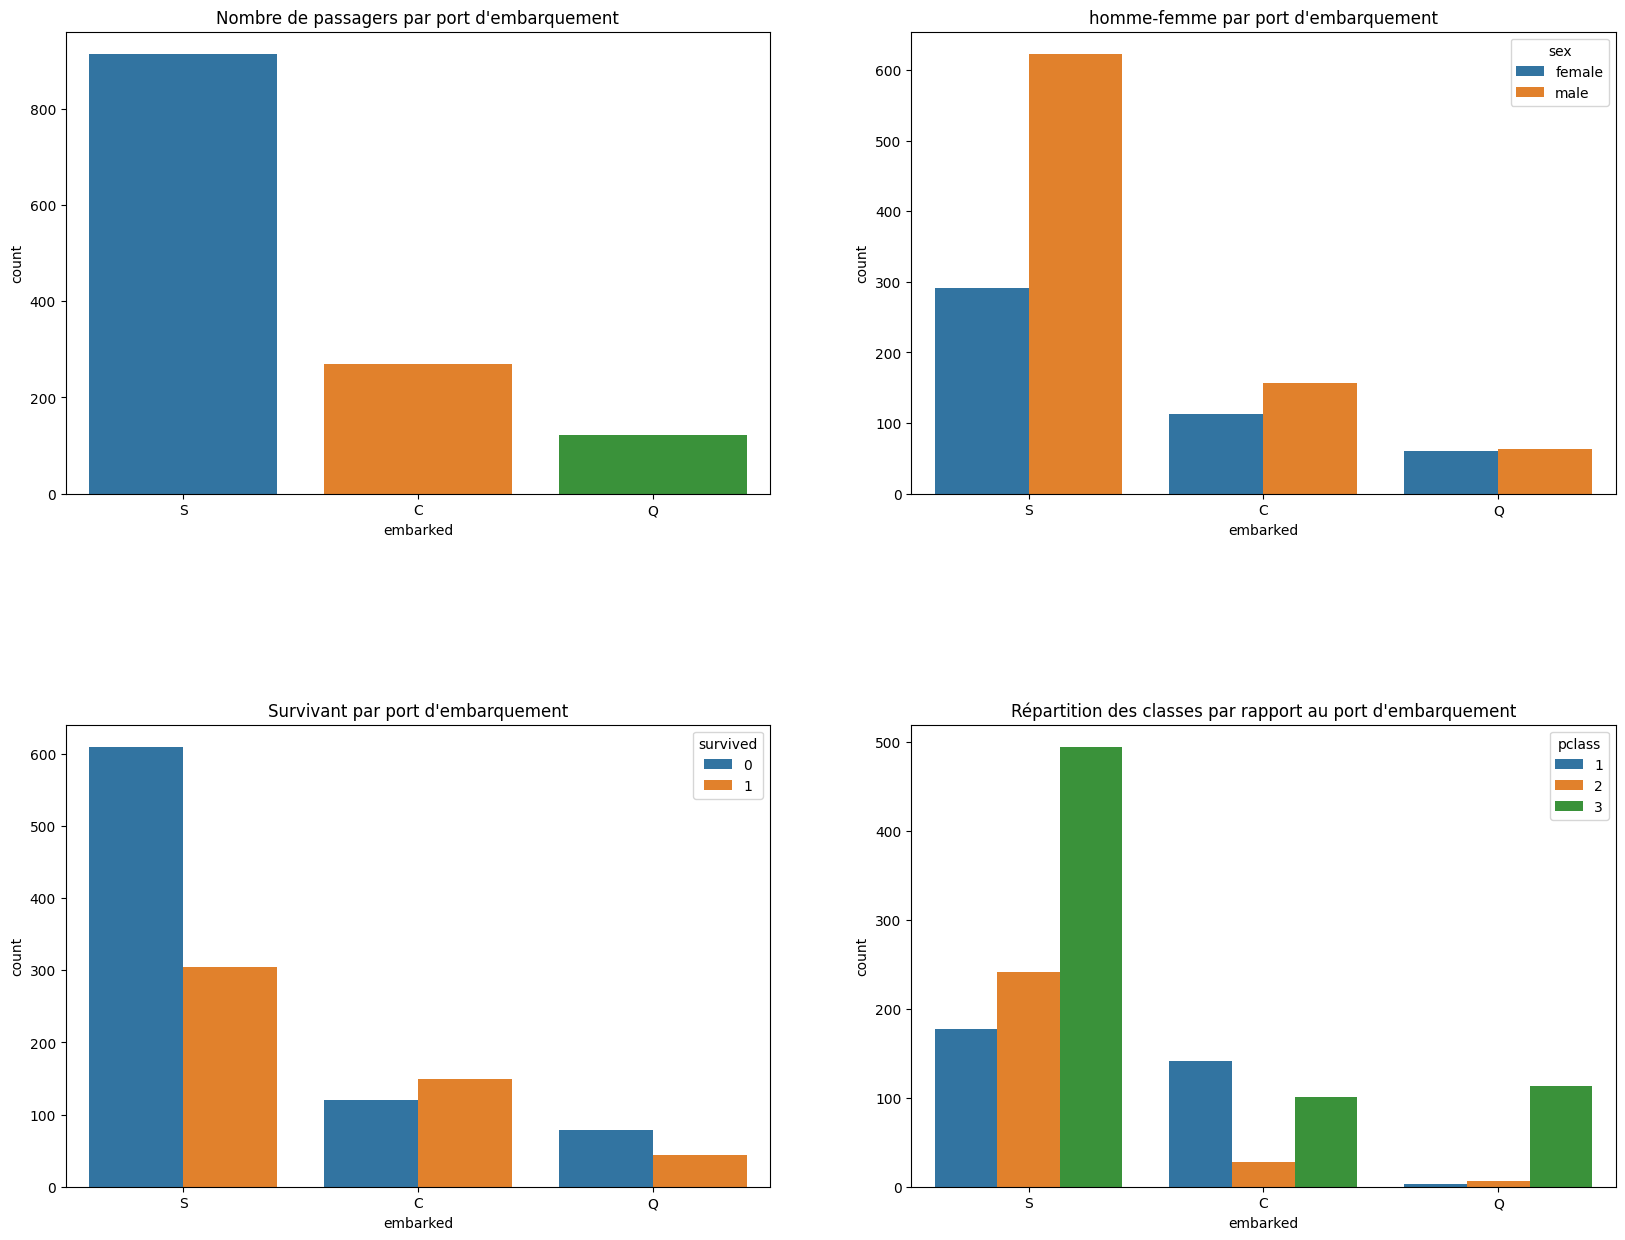

In [205]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('Nombre de passagers par port d\'embarquement')
sns.countplot(x='embarked',hue='sex',data=data,ax=ax[0,1])
ax[0,1].set_title('homme-femme par port d\'embarquement')
sns.countplot(x='embarked',hue='survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Survivant par port d\'embarquement')
sns.countplot(x='embarked',hue='pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Répartition des classes par rapport au port d\'embarquement')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

Le haut taux de survie du port C peut s'expliquer par sa grande proportion de personne en première classe. Alors que les ports S et Q possèdent une majorité de troisième classe, qui possédaient un taux de survie moindre.

c:\environnement\.venv\lib\site-packages\seaborn\categorical.py:3024: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


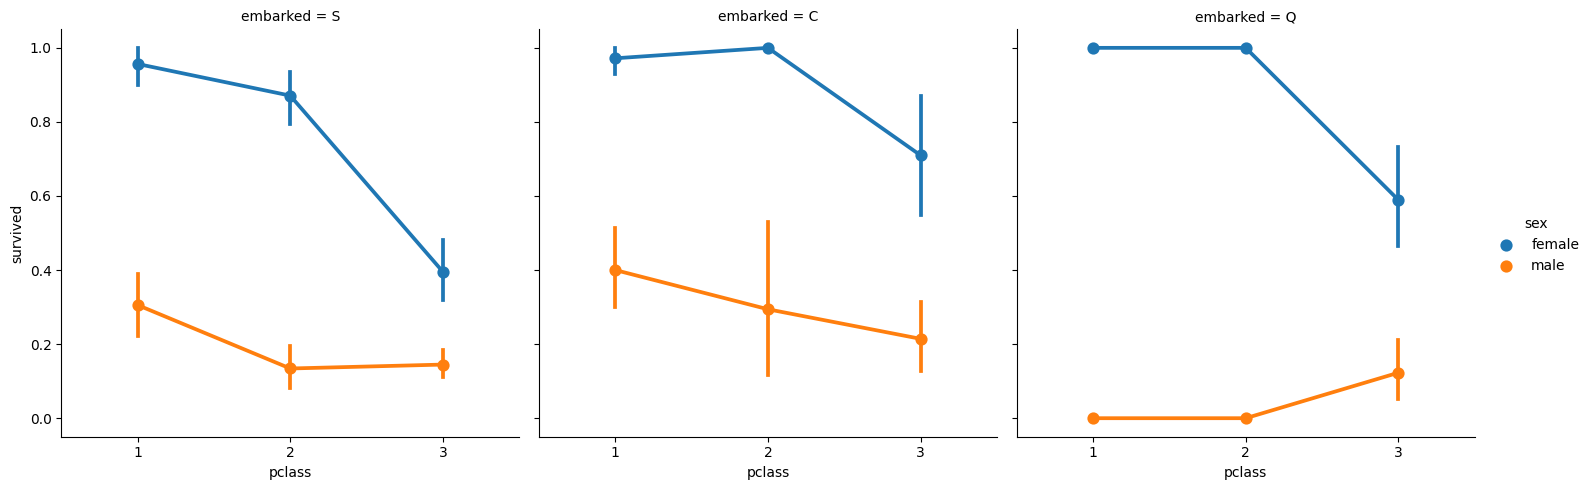

In [206]:
sns.catplot(x='pclass',y='survived',hue='sex',col='embarked',data=data, kind="point",ax=ax)

Pour les femmes de premières classes et deuxième classe, le port d'origine ne change rien à leur haut taux de survie. Pour le port Q, la proportion d'homme de troisième classe peut expliquer le taux de survie plus important.

In [207]:
data['embarked'].fillna('S', inplace=True)

In [208]:
data.embarked.isnull().any()

False

## Taux de survie en fonction du 'nombre de frère et soeur'

In [209]:
pd.crosstab(data.sibsp, data.survived).style.background_gradient(cmap='summer_r')

survived,0,1
sibsp,,
0,582,309
1,156,163
2,23,19
3,14,6
4,19,3
5,6,0
8,9,0


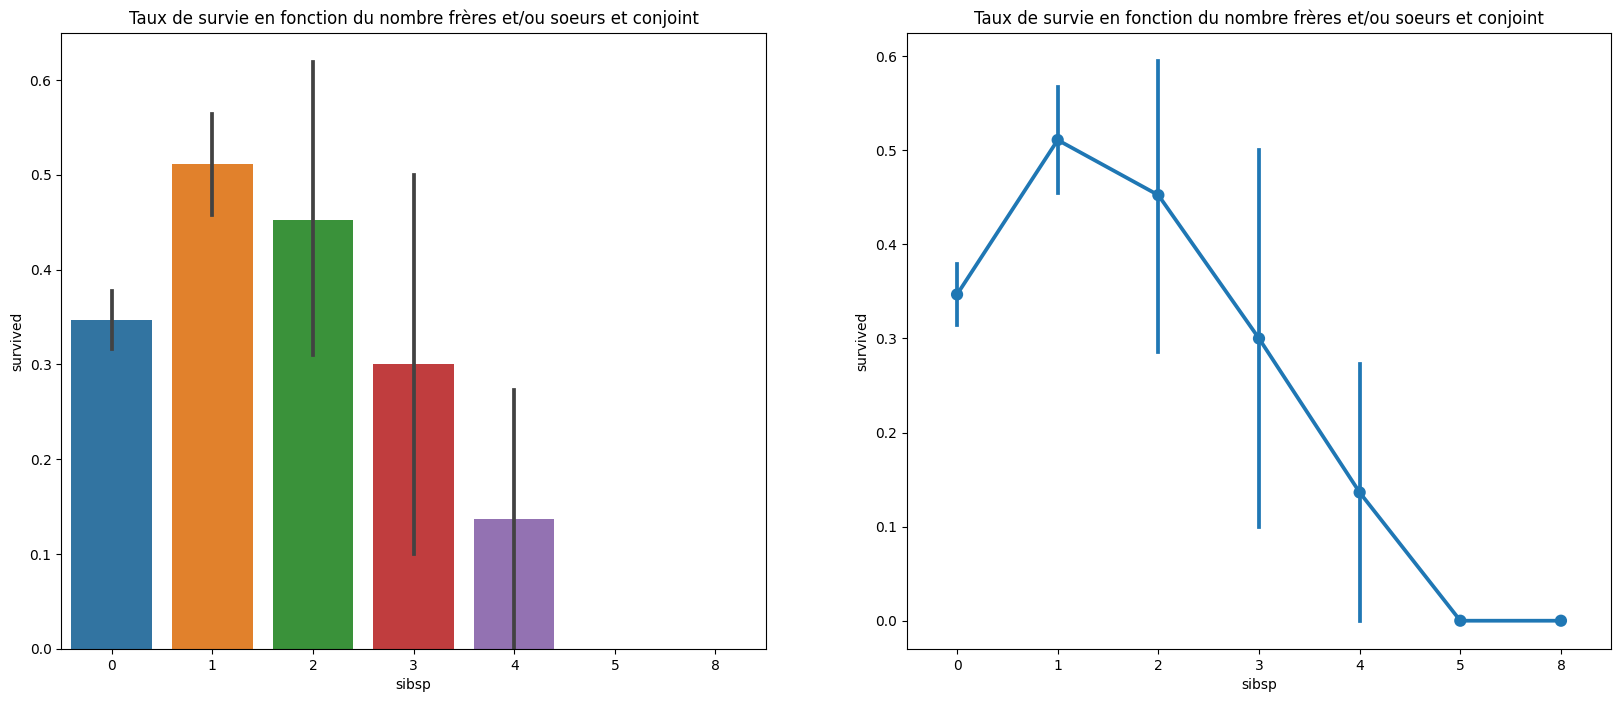

In [210]:
f,ax= plt.subplots(1, 2, figsize=(20,8))
sns.barplot(x='sibsp',y='survived', data=data, ax=ax[0])
ax[0].set_title('Taux de survie en fonction du nombre frères et/ou soeurs et conjoint')
sns.pointplot(x='sibsp',y='survived', data=data, ax=ax[1])
ax[1].set_title('Taux de survie en fonction du nombre frères et/ou soeurs et conjoint')
plt.close(2)

In [211]:
pd.crosstab(data.sibsp, data.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
sibsp,,,
0,198,182,511
1,113,82,124
2,8,12,22
3,4,1,15
4,0,0,22
5,0,0,6
8,0,0,9


Les personnes montaient seules possèdent un taux de survie de 35%. Le taux monte à 50% lorsqu'un autre membre de la famille est présent. Au dela de deux, il diminue. Aucune famille au delà de quatre membres n'a survécu, ces dernières se trouvaient en troisième classe.

## Taux de survie en fonction de la relation parent/enfants

In [212]:
pd.crosstab(data.parch, data.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
parch,,,
0,242,206,554
1,50,43,77
2,27,25,61
3,2,3,3
4,2,0,4
5,0,0,6
6,0,0,2
9,0,0,2


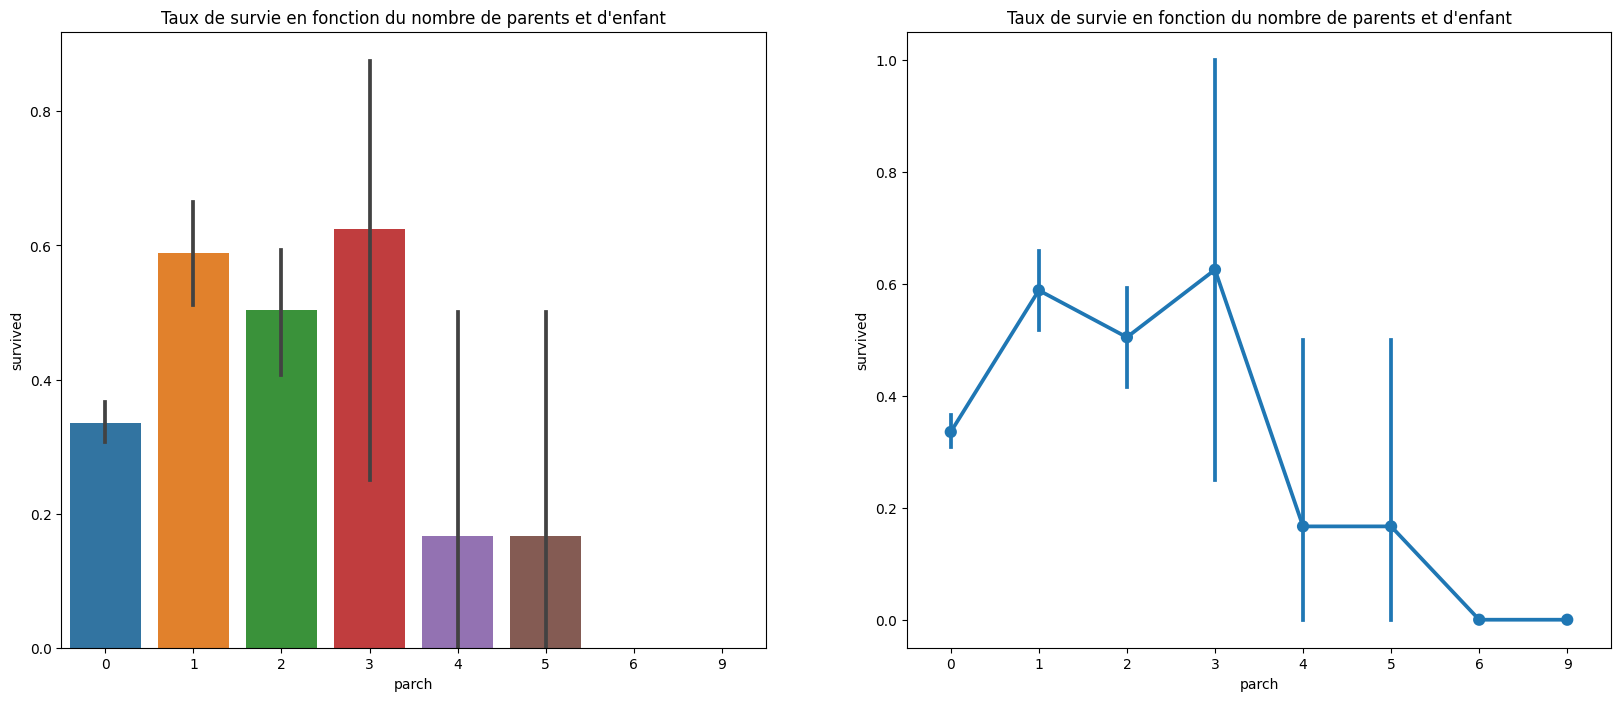

In [213]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='parch',y='survived',data=data,ax=ax[0])
ax[0].set_title('Taux de survie en fonction du nombre de parents et d\'enfant')
sns.pointplot(x='parch',y='survived',data=data,ax=ax[1])
ax[1].set_title('Taux de survie en fonction du nombre de parents et d\'enfant')
plt.close(2)
plt.show()

Le taux se survie est sensiblement le même que la présence de frère et soeur. De même, les familles à 6 membres n'ont pas survécu, tous se trouvaient en troisième classe.

Taux de survie en fonction du 'prix du billet'

In [214]:
print(f'''Le prix du billet le plus élevé était {data['fare'].max()}''')
print(f'''Le prix bu billet le plus faible était: {data['fare'].min()}''')
print(f'''Le prix moyen du billet était: {round(data['fare'].mean(), 2)}''')

Le prix du billet le plus élevé était 512.3292
Le prix bu billet le plus faible était: 0.0
Le prix moyen du billet était: 33.3


Text(0.5, 1.0, 'Prix du billet pour les troisième classe')

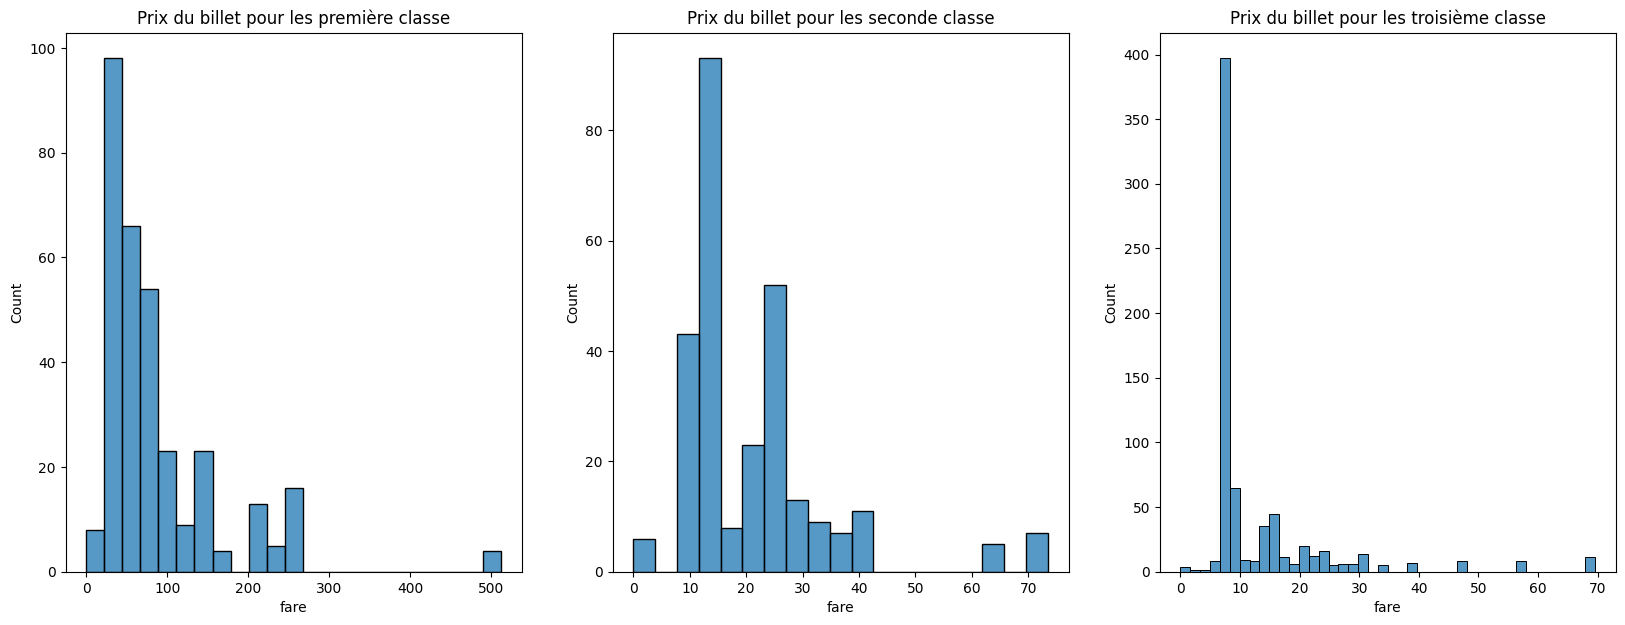

In [215]:
f,ax=plt.subplots(1,3,figsize=(20,7))
sns.histplot(data[data['pclass']==1].fare,ax=ax[0])
ax[0].set_title('Prix du billet pour les première classe')
sns.histplot(data[data['pclass']==2].fare,ax=ax[1])
ax[1].set_title('Prix du billet pour les seconde classe')
sns.histplot(data[data['pclass']==3].fare,ax=ax[2])
ax[2].set_title('Prix du billet pour les troisième classe')

Les paramètres sex, pclass, age, embarked, parch et sibsp étudiés indiquent que cela influence sur le taux de survie d'un passager lors du naufrage de Titanic.

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_9372\531360682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


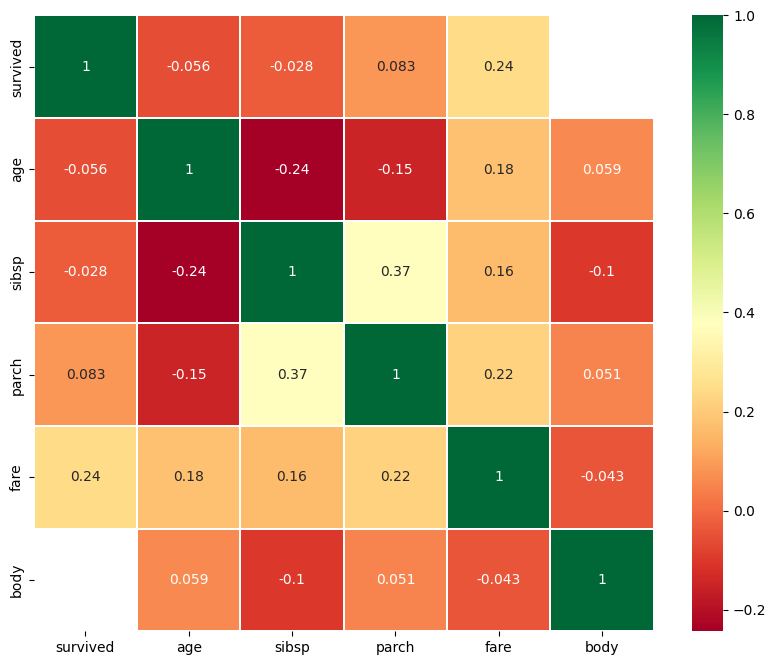

In [216]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)

Feature Engineering

In [217]:
data['age_band']=0
data.loc[data['age']<=16,'age_band']=0
data.loc[(data['age']>16)&(data['age']<=32),'age_band']=1
data.loc[(data['age']>32)&(data['age']<=48),'age_band']=2
data.loc[(data['age']>48)&(data['age']<=64),'age_band']=3
data.loc[data['age']>64,'age_band']=4
data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_band
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0


In [218]:
data['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,age_band
1,524
0,397
2,269
3,106
4,13


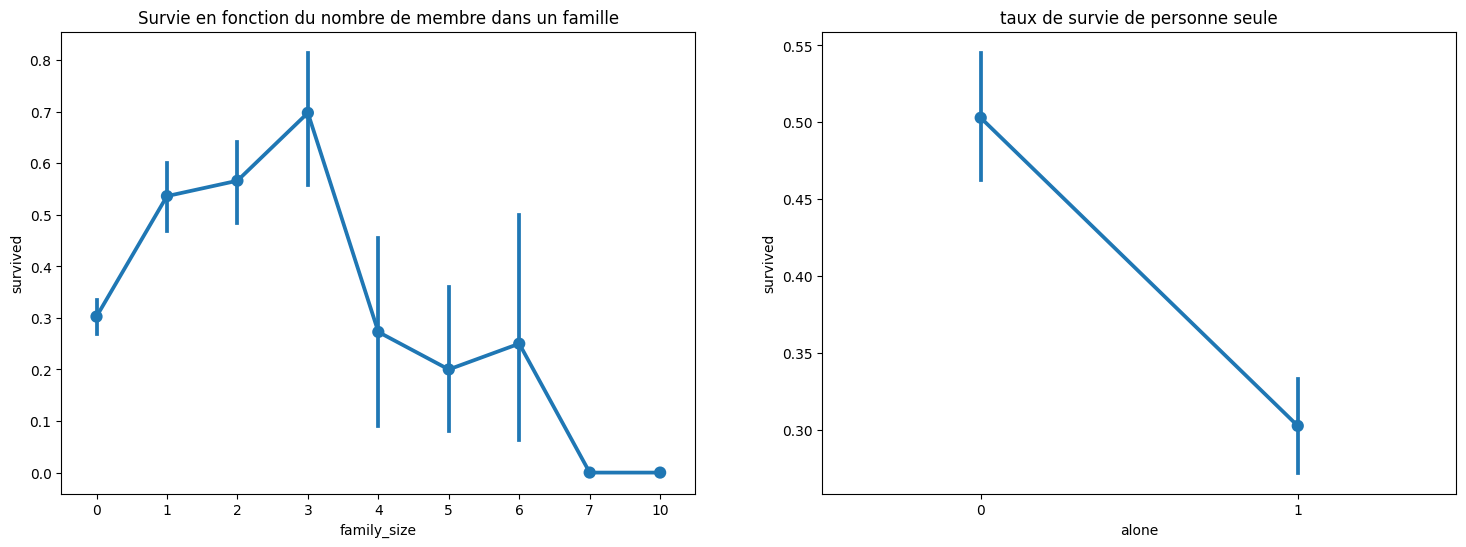

In [219]:
data['family_size']=0
data['family_size']=data['parch']+data['sibsp']
data['alone']=0
data.loc[data.family_size==0,'alone']=1

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='family_size',y='survived',data=data,ax=ax[0])
ax[0].set_title('Survie en fonction du nombre de membre dans un famille')
sns.pointplot(x='alone',y='survived',data=data,ax=ax[1])
ax[1].set_title('taux de survie de personne seule')
plt.close(2)
plt.close(3)
plt.show()

In [220]:
data['fare_range']= pd.qcut(data['fare'], 4)
data.groupby(['fare_range'])['survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,survived
fare_range,
"(-0.001, 7.896]",0.228487
"(7.896, 14.454]",0.284375
"(14.454, 31.275]",0.435976
"(31.275, 512.329]",0.585139


In [221]:
data['fare_cat']=0
data.loc[data['fare']<=7.91,'fare_cat']=0
data.loc[(data['fare']>7.91)&(data['fare']<=14.454),'fare_cat']=1
data.loc[(data['fare']>14.454)&(data['fare']<=31),'fare_cat']=2
data.loc[(data['fare']>31)&(data['fare']<=513),'fare_cat']=3

In [222]:
data.head()
data.drop("fare_range", axis=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_band,family_size,alone,fare_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1,3
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,3,0,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3,0,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0,1,0,2
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0,1,0,2
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1,0,1,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1,0,1,0


<AxesSubplot: xlabel='fare_cat', ylabel='survived'>

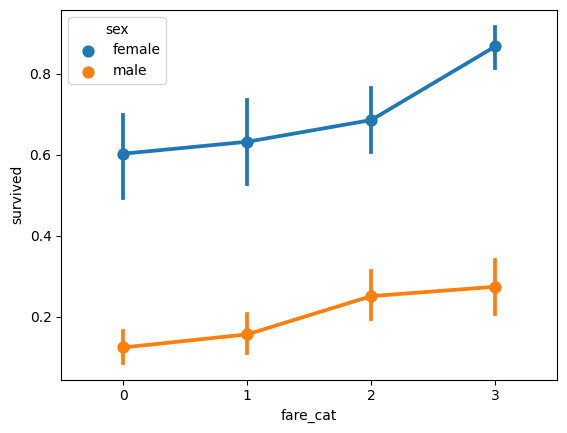

In [223]:
sns.pointplot(x='fare_cat',y='survived',hue='sex', data=data)

In [224]:
data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_band,family_size,alone,fare_range,fare_cat
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,0,2,NaN,"St Louis, MO",1,0,1,"(31.275, 512.329]",3
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,0,11,NaN,"Montreal, PQ / Chesterville, ON",0,3,0,"(31.275, 512.329]",3
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0,"(31.275, 512.329]",3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,0,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3,0,"(31.275, 512.329]",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,0,"(31.275, 512.329]",3
5,1,1,"Anderson, Mr. Harry",0,48.0000,0,0,19952,26.5500,E12,0,3,NaN,"New York, NY",2,0,1,"(14.454, 31.275]",2
6,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0000,1,0,13502,77.9583,D7,0,10,NaN,"Hudson, NY",3,1,0,"(31.275, 512.329]",3
7,1,0,"Andrews, Mr. Thomas Jr",0,39.0000,0,0,112050,0.0000,A36,0,NaN,NaN,"Belfast, NI",2,0,1,"(-0.001, 7.896]",0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,53.0000,2,0,11769,51.4792,C101,0,D,NaN,"Bayside, Queens, NY",3,2,0,"(31.275, 512.329]",3
9,1,0,"Artagaveytia, Mr. Ramon",0,71.0000,0,0,PC 17609,49.5042,NaN,1,NaN,22.0,"Montevideo, Uruguay",4,0,1,"(31.275, 512.329]",3


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_9372\1592052353.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'survived'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'age'),
  Text(0, 3.5, 'sibsp'),
  Text(0, 4.5, 'parch'),
  Text(0, 5.5, 'fare'),
  Text(0, 6.5, 'embarked'),
  Text(0, 7.5, 'body'),
  Text(0, 8.5, 'age_band'),
  Text(0, 9.5, 'family_size'),
  Text(0, 10.5, 'alone'),
  Text(0, 11.5, 'fare_cat')])

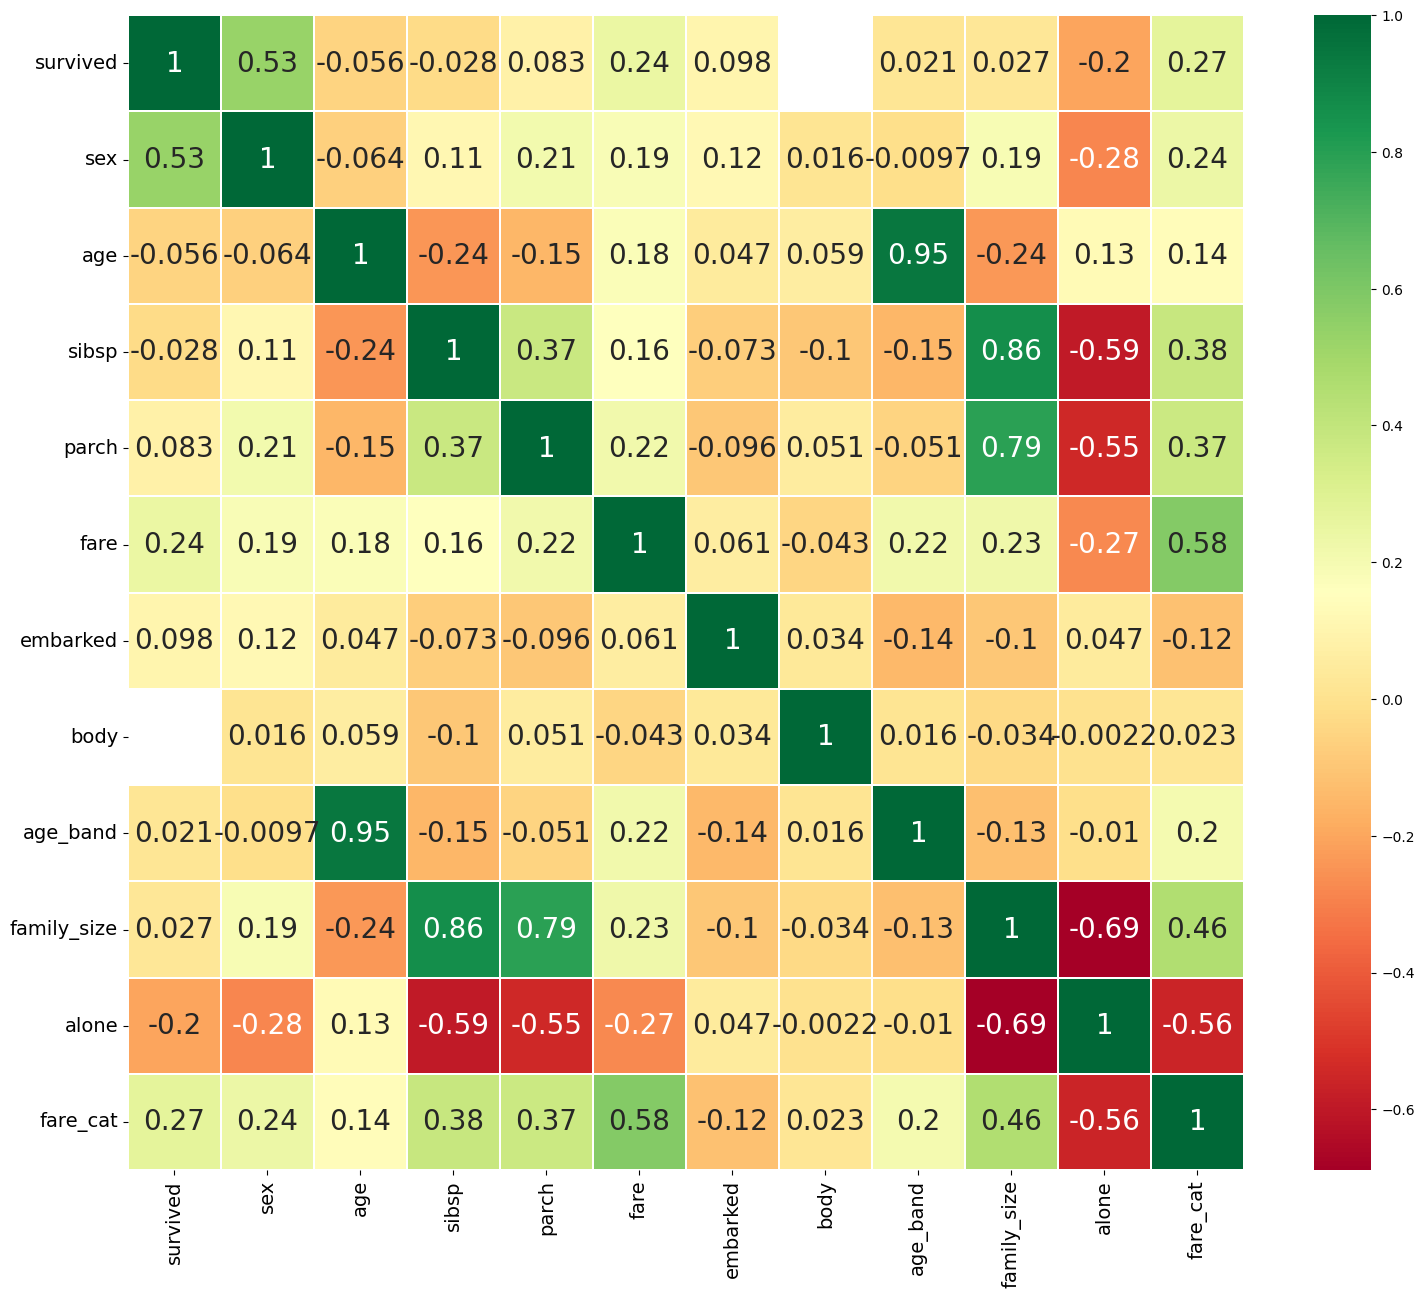

In [225]:
#data.drop(['name','age','ticket','fare','cabin','fare_range', 'home.dest', 'body', 'boat'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


<AxesSubplot: xlabel='age_pars', ylabel='count'>

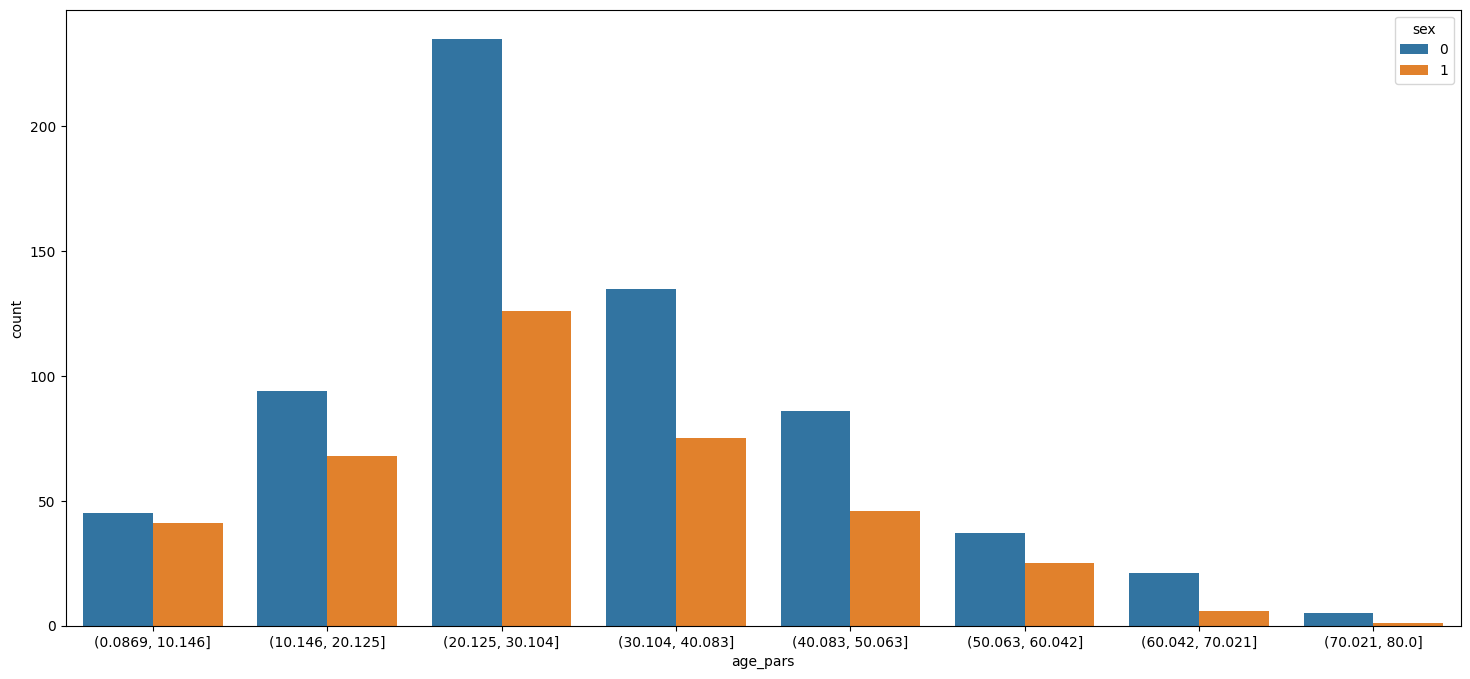

In [278]:
plt.subplots(figsize=(18, 8))
data['age_pars'] = pd.cut(data['age'], 8)
sns.countplot(x='age_pars', hue='sex', data=data)

<AxesSubplot: xlabel='age', ylabel='pclass'>

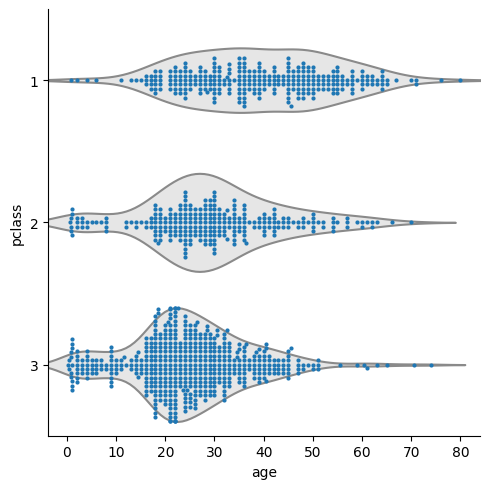

In [294]:
sns.catplot(data=data, x="age", y="pclass", kind="violin", color=".9", inner=None)
sns.swarmplot(data=data, x="age", y="pclass", size=3)